In [1]:
# Copyright 2021 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
#
# Author: Dheeraj Bharti, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

Question 4.

This question consists of two parts:<br>
  1) swapping of the three R, G, B channels<br>
  2) image rotation and translation

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def rgb_swap(np_img):
  '''
  write a program which creates three images with RGB channels swapped in each of the image. let the original image be BGR then the second and the third 
  output images should be RBG and GRB respectively. 

  Inputs:
  - img - original image

  Outputs: 
  - out_im1 - numpy array (of dtype np.uint8) containing the output image in BGR.
  - out_im2 - numpy array (of dtype np.uint8) containing the output image in RBG.
  - out_im3 - numpy array (of dtype np.uint8) containing the output image in GRB. 

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  h,w=np_img.shape[:2]

  b = np.zeros((h,w), dtype=np.uint8)            # Intialise with blank display
  g = np.zeros((h,w), dtype=np.uint8)            # Intialise with blank display
  r = np.zeros((h,w), dtype=np.uint8)            # Intialise with blank display
    
  out_im1 = np.zeros((h,w,3), dtype=np.uint8)    # Intialise with blank display 
  out_im2 = np.zeros((h,w,3), dtype=np.uint8)    # Intialise with blank display
  out_im3 = np.zeros((h,w,3), dtype=np.uint8)    # Intialise with blank display
    
  for i in range (h):
    for j in range (w):
        b[i,j]=np_img[i,j,0]
        g[i,j]=np_img[i,j,1]
        r[i,j]=np_img[i,j,2]
        
  for i in range (h):
    for j in range (w):
            
                
                out_im1[i,j,0]=b[i,j]
                out_im2[i,j,0]=r[i,j]
                out_im3[i,j,0]=g[i,j]
                
            
                
                out_im1[i,j,1]=g[i,j]
                out_im2[i,j,1]=b[i,j]
                out_im3[i,j,1]=r[i,j]
                
            
                
                out_im1[i,j,2]=r[i,j]
                out_im2[i,j,2]=g[i,j]
                out_im3[i,j,2]=b[i,j]                

                
              
    
  #############################
  # End your code here ########
  #############################   
  return [out_im1, out_im2, out_im3] 

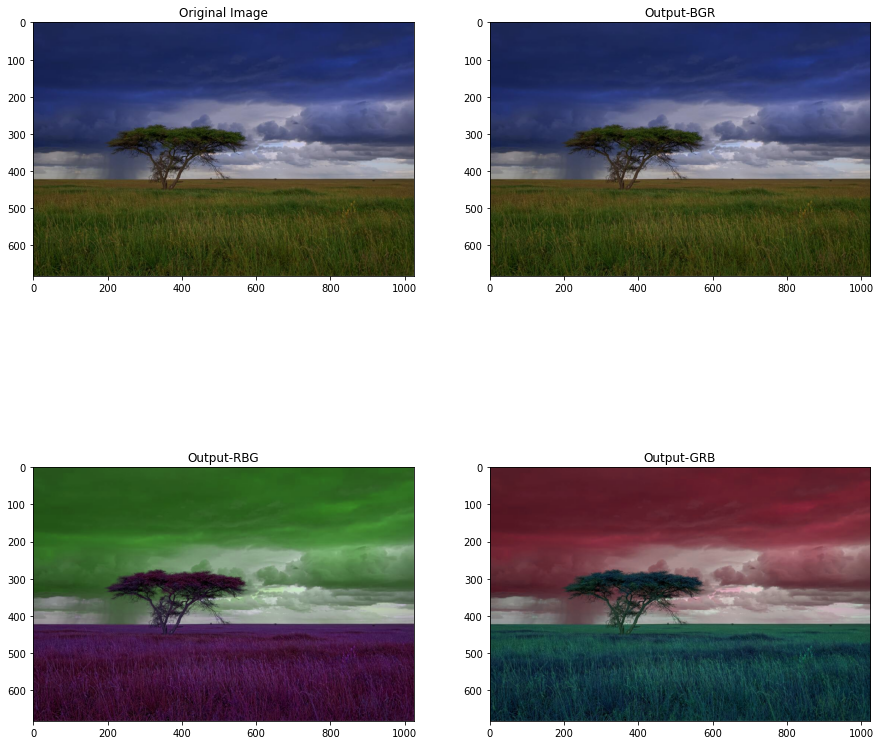

In [4]:
## Test run

## Write a script which runs the above function for the given image and plot the different images in a pyplot subplot observing the changes.

im = cv2.imread('q2im1.jpg')
np_img = np.array(im)
output_images=rgb_swap(np_img)
f, swaparr = plt.subplots(2,2,figsize=(15,15))
swaparr[0,0].imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
swaparr[0,0].title.set_text('Original Image')
swaparr[0,1].imshow(cv2.cvtColor(output_images[0], cv2.COLOR_BGR2RGB))
swaparr[0,1].title.set_text('Output-BGR')
swaparr[1,0].imshow(cv2.cvtColor(output_images[1], cv2.COLOR_BGR2RGB))
swaparr[1,0].title.set_text('Output-RBG')
swaparr[1,1].imshow(cv2.cvtColor(output_images[2], cv2.COLOR_BGR2RGB))
swaparr[1,1].title.set_text('Output-GRB')



In [5]:
def transform_image(shift, theta):
  '''
  write a program which translate and rotates a white square of size 100x100 pixels. First create an image of size 512x512 pixels having black background 
  and a square of size 100x100 in the center of the image. now write a code which shifts the square by given pixel value and rotates it counter clockwise by 
  given angle theta.

  Inputs:
  - img - original image
  - shift - a 2x1 array having the pixel shift value in x direction and y direction
  - theta - angle of roatation in degrees in counter clockwise direction

  Outputs: 
  - out_im - numpy array (of dtype np.uint8) containing the output image.

  Allowed external package:
  You are not allowed to use any direct implementations 
  '''

  #############################
  # Start your code from here #
  #############################
    
  out_img1 = np.zeros((512, 512), dtype=np.uint8)           # Intialise with blank display
  for i in range (207,307,1):
        for j in range (207,307,1):
            out_img1[i,j]=255
  out_img = np.zeros((512, 512), dtype=np.uint8)            # Intialise with blank display
  
           
  x_shift=shift[0][0]
  y_shift=shift[1][0]
    
  if(x_shift > 0):
    for i in range (207,307,1):
        for j in range (306,206,-1):
            var_img=out_img1[i,j]
            out_img1[i,j]=0
            out_img1[i,j+x_shift]=var_img
            
            
  else: 
    for i in range (207,307,1):
        for j in range (207,307,1):
            var_img=out_img1[i,j]
            out_img1[i,j]=0
            out_img1[i,j+x_shift]=var_img
            
            
  if(y_shift > 0):
    for i in range (207,307,1):
        for j in range (207+x_shift,307+x_shift,1):
            var_img=out_img1[i,j]
            out_img1[i,j]=0
            out_img1[i-y_shift,j]=var_img
            
            
  else:
    for i in range (306,206,-1):
        for j in range (207+x_shift,307+x_shift,1):
            var_img=out_img1[i,j]
            out_img1[i,j]=0
            out_img1[i-y_shift,j]=var_img
            
            
            
  newcent_x=256+x_shift
  newcent_y=256-y_shift
    
  sin_v=np.sin(np.radians(theta))
  cos_v=np.cos(np.radians(theta))
    
  for i in range(306-y_shift,206-y_shift,-1):
    for j in range(306+x_shift,206+x_shift,-1):
        
        x2 =(cos_v*(i-newcent_y) - sin_v*(j-newcent_x) + newcent_y )
        y2 =(cos_v*(j-newcent_x) + sin_v*(i-newcent_y) + newcent_x )
        
        for m in range (int(x2),int(x2+2),1):
            for n in range (int(y2),int(y2+2),1):
              out_img[m,n]=out_img1[i,j]
    
  
    
  #############################
  # End your code here ########
  #############################    

  return np.uint8(out_img)

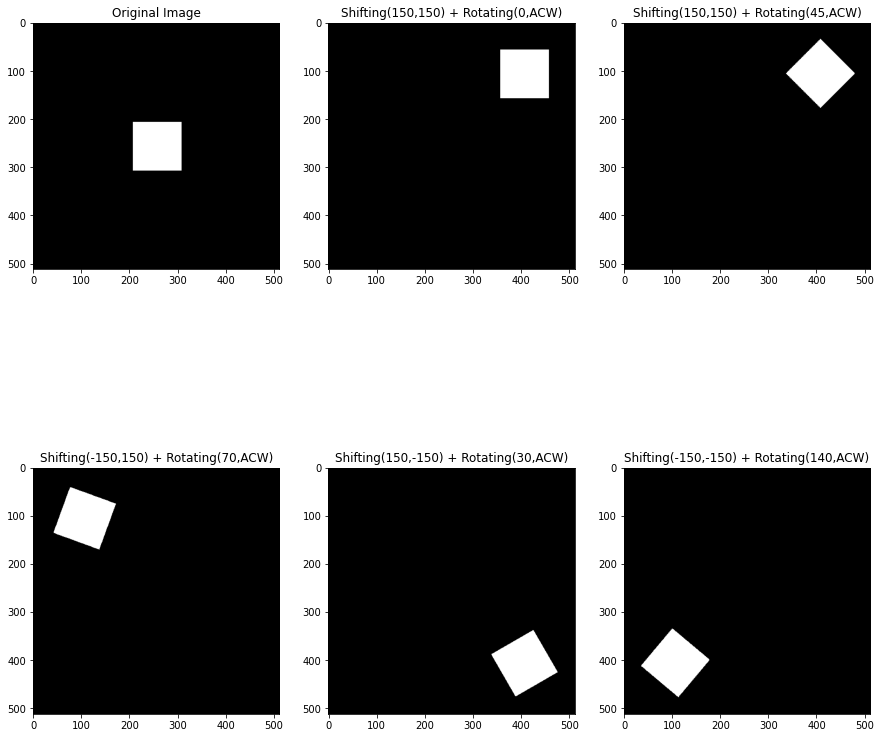

In [6]:
# Write a script which tests your function for atleast 5 different combinations of rotation and translation

            


im1 = transform_image([[0],[0]], 0)
im2 = transform_image([[150],[150]], 0)
im3 = transform_image([[150],[150]], 45)
im4 = transform_image([[-150],[150]], 70)
im5 = transform_image([[150],[-150]], 30)
im6 = transform_image([[-150],[-150]], 140)



f, shift_rotate = plt.subplots(2,3,figsize=(15,15))
shift_rotate[0,0].imshow(im1, cmap="gray")
shift_rotate[0,0].title.set_text('Original Image')
shift_rotate[0,1].imshow(im2, cmap="gray")
shift_rotate[0,1].title.set_text('Shifting(150,150) + Rotating(0,ACW)')
shift_rotate[0,2].imshow(im3, cmap="gray")
shift_rotate[0,2].title.set_text('Shifting(150,150) + Rotating(45,ACW)')
shift_rotate[1,0].imshow(im4, cmap="gray")
shift_rotate[1,0].title.set_text('Shifting(-150,150) + Rotating(70,ACW)')
shift_rotate[1,1].imshow(im5, cmap="gray")
shift_rotate[1,1].title.set_text('Shifting(150,-150) + Rotating(30,ACW)')
shift_rotate[1,2].imshow(im6, cmap="gray")
shift_rotate[1,2].title.set_text('Shifting(-150,-150) + Rotating(140,ACW)')





